In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("data/food_coded.csv")
print(df.columns)
df.head()

Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons',
       'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded.1',
       'cuisine', 'diet_current', 'diet_current_coded', 'drink',
       'eating_changes', 'eating_changes_coded', 'eating_changes_coded1',
       'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


## Extracting the features, Data Cleaning

In [3]:
cols = ['cook','eating_out','employment', 'ethnic_food','exercise','fruit_day','income','on_off_campus','pay_meal_out','sports','veggies_day']
newdf = df[cols]
newdf.head(10)

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
0,2.0,3,3.0,1,1.0,5,5.0,1.0,2,1.0,5
1,3.0,2,2.0,4,1.0,4,4.0,1.0,4,1.0,4
2,1.0,2,3.0,5,2.0,5,6.0,2.0,3,2.0,5
3,2.0,2,3.0,5,3.0,4,6.0,1.0,2,2.0,3
4,1.0,2,2.0,4,1.0,4,6.0,1.0,4,1.0,4
5,3.0,1,3.0,4,2.0,2,1.0,1.0,5,2.0,1
6,2.0,2,3.0,5,1.0,4,4.0,2.0,2,1.0,4
7,3.0,2,2.0,2,2.0,5,5.0,1.0,5,2.0,4
8,3.0,5,2.0,5,NaN,4,5.0,1.0,3,2.0,3
9,3.0,3,3.0,5,1.0,5,4.0,1.0,3,1.0,5


In [4]:
newdf.isnull().sum()


cook              3
eating_out        0
employment        9
ethnic_food       0
exercise         13
fruit_day         0
income            1
on_off_campus     1
pay_meal_out      0
sports            2
veggies_day       0
dtype: int64

dealing with null values in **income** column

In [5]:
print(newdf[newdf['income'].isnull()].index)
newdf.income[100:105]

Int64Index([102], dtype='int64')


100    2.0
101    5.0
102    NaN
103    4.0
104    5.0
Name: income, dtype: float64

In [6]:
newdf.income = newdf.income.fillna((newdf.income.mode()[0]))
newdf.income[100:105]

c:\Users\patna\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


100    2.0
101    5.0
102    6.0
103    4.0
104    5.0
Name: income, dtype: float64

dealing with null values in **on_off_campus** column

In [7]:
print("no. of unique values : {}".format(newdf.on_off_campus.nunique()))
print(newdf[newdf['on_off_campus'].isnull()].index)
newdf.on_off_campus[40:46]

no. of unique values : 4
Int64Index([43], dtype='int64')


40    1.0
41    1.0
42    1.0
43    NaN
44    2.0
45    1.0
Name: on_off_campus, dtype: float64

In [8]:
newdf.on_off_campus = newdf.on_off_campus.fillna((newdf.on_off_campus.mode()[0]))
newdf.on_off_campus[40:46]

40    1.0
41    1.0
42    1.0
43    1.0
44    2.0
45    1.0
Name: on_off_campus, dtype: float64

dealing with null values in **sports** column

In [9]:
print("no. of unique values : {}".format(newdf.sports.nunique()))
nan_sports = newdf[newdf.sports.isnull()].index.tolist()
nan_sports

no. of unique values : 2


[19, 121]

In [10]:
newdf.sports = newdf.sports.fillna((newdf.sports.mode()[0]))
newdf.sports[nan_sports]

19     1.0
121    1.0
Name: sports, dtype: float64

dealing with null values in **exercise** column

In [11]:
nan_exercise = newdf[newdf.exercise.isnull()].index.tolist()
print("indices of null values :")
print(nan_exercise)

indices of null values :
[8, 24, 32, 42, 43, 45, 53, 59, 66, 83, 99, 104, 117]


In [12]:
newdf.exercise = newdf.exercise.fillna((newdf.exercise.mode()[0]))
newdf.exercise[nan_exercise]

8      1.0
24     1.0
32     1.0
42     1.0
43     1.0
45     1.0
53     1.0
59     1.0
66     1.0
83     1.0
99     1.0
104    1.0
117    1.0
Name: exercise, dtype: float64

dealing with null values in **employment** column

In [13]:
nan_employment = newdf[newdf.employment.isnull()].index.tolist()
print("indices of null values :")
print(nan_employment)
print("no. of unique values : {}".format(newdf.employment.nunique()))

newdf.employment = newdf.employment.fillna((newdf.employment.mode()[0]))
newdf.employment[nan_employment]

indices of null values :
[43, 47, 49, 52, 53, 83, 94, 105, 106]
no. of unique values : 3


43     2.0
47     2.0
49     2.0
52     2.0
53     2.0
83     2.0
94     2.0
105    2.0
106    2.0
Name: employment, dtype: float64

dealing with null values in **cook** column

In [14]:
nan_cook = newdf[newdf.cook.isnull()].index.tolist()
print("indices of null values :")
print(nan_cook)
print("no. of unique values : {}".format(newdf.cook.nunique()))

newdf.cook = newdf.cook.fillna((newdf.cook.mode()[0]))
newdf.cook[nan_cook]

indices of null values :
[82, 88, 124]
no. of unique values : 5


82     3.0
88     3.0
124    3.0
Name: cook, dtype: float64

In [15]:
print(newdf.shape)
print(newdf.isnull().sum())
newdf.to_csv("food_choices.csv")

(125, 11)
cook             0
eating_out       0
employment       0
ethnic_food      0
exercise         0
fruit_day        0
income           0
on_off_campus    0
pay_meal_out     0
sports           0
veggies_day      0
dtype: int64


## Data Exploration and Visualisation

In [16]:
newdf.describe()

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
count,125.000000,125.00000,125.000000,125.000000,125.00000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,2.792000,2.56000,2.416000,3.744000,1.52800,4.224000,4.544000,1.320000,3.408000,1.384000,4.008000
std,1.026236,1.13876,0.526461,1.177093,0.65471,0.923388,1.456376,0.679184,1.040285,0.488315,1.081337
min,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000
25%,2.000000,2.00000,2.000000,3.000000,1.00000,4.000000,4.000000,1.000000,3.000000,1.000000,3.000000
50%,3.000000,2.00000,2.000000,4.000000,1.00000,5.000000,5.000000,1.000000,3.000000,1.000000,4.000000
75%,3.000000,3.00000,3.000000,5.000000,2.00000,5.000000,6.000000,1.000000,4.000000,2.000000,5.000000
max,5.000000,5.00000,3.000000,5.000000,3.00000,5.000000,6.000000,4.000000,6.000000,2.000000,5.000000


### Plotting Boxplot for cleaned data

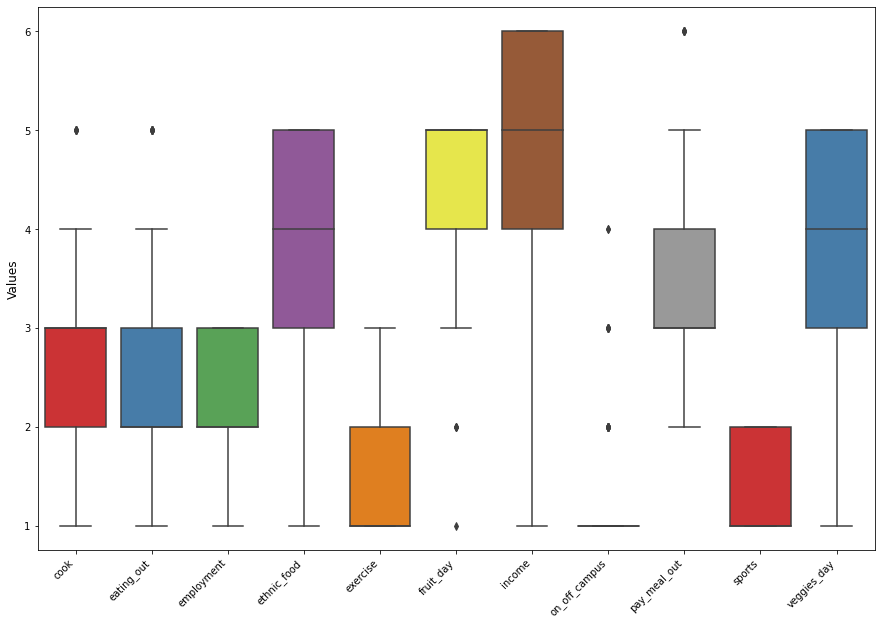

In [17]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.boxplot(data=newdf, palette="Set1").tick_params(labelsize=10)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Values", fontsize=12)
plt.show()

## K-Means clustering on cleaned data

In [18]:
from sklearn.cluster import KMeans
k = 3
km = KMeans(n_clusters = k) 
km.fit(newdf)

KMeans(n_clusters=3)

In [19]:
newdf.loc[ : , 'cluster'] = km.labels_
newdf.head(10)

c:\Users\patna\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day,cluster
0,2.0,3,3.0,1,1.0,5,5.0,1.0,2,1.0,5,0
1,3.0,2,2.0,4,1.0,4,4.0,1.0,4,1.0,4,2
2,1.0,2,3.0,5,2.0,5,6.0,2.0,3,2.0,5,1
3,2.0,2,3.0,5,3.0,4,6.0,1.0,2,2.0,3,1
4,1.0,2,2.0,4,1.0,4,6.0,1.0,4,1.0,4,1
5,3.0,1,3.0,4,2.0,2,1.0,1.0,5,2.0,1,2
6,2.0,2,3.0,5,1.0,4,4.0,2.0,2,1.0,4,2
7,3.0,2,2.0,2,2.0,5,5.0,1.0,5,2.0,4,0
8,3.0,5,2.0,5,1.0,4,5.0,1.0,3,2.0,3,1
9,3.0,3,3.0,5,1.0,5,4.0,1.0,3,1.0,5,1


**income** : <br>
1 - less than $15,000 <br>
2 - $15,001 to $30,000 <br>
3 - $30,001 to $50,000 <br>
4 - $50,001 to $70,000 <br>
5 - $70,001 to $100,000 <br>
6 - higher than $100,000
<br> mentioned in the codebook_food.docx

In [20]:
newdf.groupby('cluster').count()

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
cluster,,,,,,,,,,,
0,38,38,38,38,38,38,38,38,38,38,38
1,48,48,48,48,48,48,48,48,48,48,48
2,39,39,39,39,39,39,39,39,39,39,39


## Getting Geolocational Data from HERE Geo coding API

In [45]:
import json                                 # to dump data in json format
from pandas.io.json import json_normalize   # to convert json data into dataframe
import requests                             # allows you to send HTTP requests using Python
import folium                               # to create map

Here we use real time data from **REST API (HERE Geo coding API)** for **KIIT University (20.3548, 85.8153)** to find accommodation for students around the area.


In [46]:
api_key = 'HQnXzbAMqxR6rjiSSDkA23cqOJ-505vZevoSWfsYVW8'
latitude = 20.3548                         # college location
longitude = 85.8153
radius = '10000'                           # in meters
query = 'apartment'                        # searching for residential locations
limit = 100                               # maximum number of results to return

In [47]:
#Fetching data from HERE API for KIIT University Bhubaneswar

url = f'https://discover.search.hereapi.com/v1/discover?in=circle:{latitude},{longitude};r={radius}&q={query}&apiKey={api_key}&limit={limit}'

data = requests.get(url).json()  # fetching data from here api

fetched_df = pd.json_normalize(data['items'])  # converting json data into dataframe
fetched_df.to_csv('api-data/apartment.csv')

In [48]:
fetched_df.columns

Index(['title', 'id', 'language', 'ontologyId', 'resultType', 'access',
       'distance', 'categories', 'address.label', 'address.countryCode',
       'address.countryName', 'address.stateCode', 'address.state',
       'address.county', 'address.city', 'address.district',
       'address.subdistrict', 'address.postalCode', 'position.lat',
       'position.lng', 'address.street', 'references'],
      dtype='object')

Cleaning the fetched data by separating the features we need

In [49]:
nearby_venues = fetched_df[['title','address.label','distance','access','position.lat','position.lng','address.postalCode','id']]
nearby_venues.to_csv('api-data/cleaned_apartment.csv')

counting no. of Restaurants, shops and gyms near apartments around KIIT University Bhubaneshwar

In [50]:
from tqdm.notebook import tqdm

API_KEY = 'HQnXzbAMqxR6rjiSSDkA23cqOJ-505vZevoSWfsYVW8'   
RADIUS = '500'                         #Set the radius to 1000 metres

places = ["Restaurants", "Shops", "Gym"]

final_df = None
final_df = nearby_venues[['position.lat','position.lng']].copy()

def query_counts(lat: float, long: float, query: str):
    url = f'https://discover.search.hereapi.com/v1/discover?in=circle:{lat},{long};r={RADIUS}&q={query}&apiKey={API_KEY}&limit=100'
    results = requests.get(url).json()
    venues = results.get('items')
    # print([q['title'] for q in venues])
    return len(venues)

for query in tqdm(places):
    final_df[query] = final_df.apply(
        lambda df: query_counts(df["position.lat"], df["position.lng"], query),
        axis=1
    )

  0%|          | 0/3 [00:00<?, ?it/s]

In [73]:
final_df.head(15)

,position.lat,position.lng,Restaurants,Shops,Gym,Cluster,total number of places
0,20.35420,85.82171,100,100,4,2,204
1,20.35757,85.82183,84,72,1,2,157
2,20.35226,85.82224,100,100,7,2,207
3,20.34745,85.81748,22,6,1,1,29
4,20.36082,85.80930,29,1,0,1,30
5,20.34701,85.81825,27,8,1,1,36
6,20.34913,85.82179,54,100,5,3,159
7,20.35117,85.82343,100,100,10,2,210
8,20.34703,85.81889,25,15,1,1,41
9,20.35502,85.82490,100,100,7,2,207


Text(0, 0.5, 'Sum of squared error (SSE)')

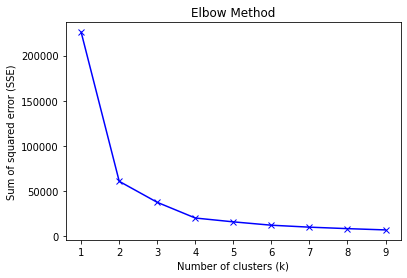

In [53]:
#Run K-means clustering on dataframe
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(final_df)
    sse.append(km.inertia_)

plt.plot(k_rng,sse, 'bx-')
plt.title("Elbow Method")
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared error (SSE)')

In [54]:
kmeans = KMeans(n_clusters= 4, random_state=0).fit(final_df)
final_df['Cluster']=kmeans.labels_
final_df['Cluster']=final_df['Cluster'].apply(str)
final_df

,position.lat,position.lng,Restaurants,Shops,Gym,Cluster
0,20.35420,85.82171,100,100,4,2
1,20.35757,85.82183,84,72,1,2
2,20.35226,85.82224,100,100,7,2
3,20.34745,85.81748,22,6,1,1
4,20.36082,85.80930,29,1,0,1
...,...,...,...,...,...,...
95,20.34785,85.77057,0,1,0,1
96,20.31174,85.82904,19,40,0,0
97,20.31178,85.82933,21,40,0,0
98,20.31679,85.84544,3,58,1,0


In [55]:
final_df.groupby('Cluster').count()

,position.lat,position.lng,Restaurants,Shops,Gym
Cluster,,,,,
0,21,21,21,21,21
1,48,48,48,48,48
2,12,12,12,12,12
3,19,19,19,19,19


In [56]:

places = ["Restaurants", "Shops", "Gym"]
final_df['total number of places'] = final_df.apply(lambda final_df: sum(final_df[places]), axis=1)
final_df

,position.lat,position.lng,Restaurants,Shops,Gym,Cluster,total number of places
0,20.35420,85.82171,100,100,4,2,204
1,20.35757,85.82183,84,72,1,2,157
2,20.35226,85.82224,100,100,7,2,207
3,20.34745,85.81748,22,6,1,1,29
4,20.36082,85.80930,29,1,0,1,30
...,...,...,...,...,...,...,...
95,20.34785,85.77057,0,1,0,1,1
96,20.31174,85.82904,19,40,0,0,59
97,20.31178,85.82933,21,40,0,0,61
98,20.31679,85.84544,3,58,1,0,62


In [72]:
final_df.to_csv('api-data/final_clusters.csv')

### Plotting clustered locations on map using Folium

In [67]:
import folium
map_kiit=folium.Map(location=[20.3548,85.8153],zoom_start=13)

# instantiate a feature group for the incidents in the dataframe
locations = folium.map.FeatureGroup()

# set color scheme for the clusters
def color_producer(cluster):
    if cluster=='0':
        return 'green'
    elif cluster=='1':
        return 'blue'
    elif cluster=='2':
        return 'orange'
    else:
        return 'red'

latitudes = list(final_df['position.lat'])
longitudes = list(final_df['position.lng'])
labels = list(final_df['Cluster'])
names=list(nearby_venues['title'])
for lat, lng, label,names in zip(latitudes, longitudes, labels,names):
    folium.CircleMarker(
            [lat,lng],
            fill=True,
            fill_opacity=1,
            popup=folium.Popup(names, max_width = 300),
            radius=5,
            color=color_producer(label)
        ).add_to(map_kiit)

# add locations to map
map_kiit.add_child(locations)
folium.Marker([20.3548,85.8153],popup='KIIT University').add_to(map_kiit)

**Cluster 0 (Green):** has almost equal number of shops and restaurants but very few gyms<br>
**Cluster 1 (Blue):** has the minimum no. of shops, restaurants and gyms in total<br>
**Cluster 2 (Orange):** has the maximum no. of shops, restaurants and gyms in total<br>
**Cluster 3 (Red):** has more shops and stores and comparitively lesser no. of restaurants and fewer gyms

In [68]:
map_kiit.save("map_kiit.html")
map_kiit